In [1]:
import pandas as pd
import requests
import numpy as np

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

def load_data(url):
    try:
      return requests.get(url).json()
    except Exception as e:
      print(f"Error loading data: {e}")
      return pd.DataFrame()

data = load_data(url)
data

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [2]:
df = pd.DataFrame(data)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
df.iloc[0,2:6]

customer    {'gender': 'Female', 'SeniorCitizen': 0, 'Part...
phone          {'PhoneService': 'Yes', 'MultipleLines': 'No'}
internet    {'InternetService': 'DSL', 'OnlineSecurity': '...
account     {'Contract': 'One year', 'PaperlessBilling': '...
Name: 0, dtype: object

In [4]:
df_curtomer_normalize = pd.json_normalize(df['customer'])
df_phone_normalize = pd.json_normalize(df['phone'])
df_internet_normalize = pd.json_normalize(df['internet'])
df_account_normalize = pd.json_normalize(df['account'])

In [5]:
df_curtomer_normalize.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [6]:
df_phone_normalize.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [7]:
df_internet_normalize.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [8]:
df_account_normalize.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
df_curtomer_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [10]:
df_curtomer_normalize['Partner'] = df_curtomer_normalize['Partner'].map({'Yes': 1, 'No': 0})
df_curtomer_normalize['Dependents'] = df_curtomer_normalize['Dependents'].map({'Yes': 1, 'No': 0})
df_curtomer_normalize.head()


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


In [11]:
df_curtomer_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   int64 
 3   Dependents     7267 non-null   int64 
 4   tenure         7267 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 284.0+ KB


In [12]:
df_curtomer_normalize['gender'] = df_curtomer_normalize['gender'].astype('string')
df_curtomer_normalize['SeniorCitizen'] = df_curtomer_normalize['SeniorCitizen'].astype(bool)
df_curtomer_normalize['Partner'] = df_curtomer_normalize['Partner'].astype(bool)
df_curtomer_normalize['Dependents'] = df_curtomer_normalize['Dependents'].astype(bool)



In [13]:
df_phone_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [14]:
print(df_phone_normalize['PhoneService'].value_counts())
print(df_phone_normalize['MultipleLines'].value_counts())

PhoneService
Yes    6560
No      707
Name: count, dtype: int64
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64


In [15]:
df_phone_normalize['PhoneService'] = df_phone_normalize['PhoneService'].apply(lambda e: 1 if e == 'Yes' else 0)
df_phone_normalize['MultipleLines'] = df_phone_normalize['MultipleLines'].apply(lambda e: 1 if e == 'Yes' else 0)
df_phone_normalize.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [16]:
df_phone_normalize['PhoneService'] = df_phone_normalize['PhoneService'].astype(bool)
df_phone_normalize['MultipleLines'] = df_phone_normalize['MultipleLines'].astype(bool)
df_phone_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PhoneService   7267 non-null   bool 
 1   MultipleLines  7267 non-null   bool 
dtypes: bool(2)
memory usage: 14.3 KB


In [17]:
df_internet_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [18]:
print(df_internet_normalize['InternetService'].value_counts())
print(df_internet_normalize['OnlineSecurity'].value_counts())
print(df_internet_normalize['OnlineBackup'].value_counts())
print(df_internet_normalize['DeviceProtection'].value_counts())
print(df_internet_normalize['TechSupport'].value_counts())
print(df_internet_normalize['StreamingTV'].value_counts())
print(df_internet_normalize['StreamingMovies'].value_counts())

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64
DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64
TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64
StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64
StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64


In [19]:
list_columns_bool = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in list_columns_bool:
  df_internet_normalize[column] = df_internet_normalize[column].apply(lambda e: 1 if e == 'Yes' else 0)
  df_internet_normalize[list_columns_bool] = df_internet_normalize[list_columns_bool].astype(bool)

df_internet_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   bool  
 2   OnlineBackup      7267 non-null   bool  
 3   DeviceProtection  7267 non-null   bool  
 4   TechSupport       7267 non-null   bool  
 5   StreamingTV       7267 non-null   bool  
 6   StreamingMovies   7267 non-null   bool  
dtypes: bool(6), object(1)
memory usage: 99.5+ KB


In [20]:
df_internet_normalize['InternetService'] = df_internet_normalize['InternetService'].astype('string')

df_internet_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   string
 1   OnlineSecurity    7267 non-null   bool  
 2   OnlineBackup      7267 non-null   bool  
 3   DeviceProtection  7267 non-null   bool  
 4   TechSupport       7267 non-null   bool  
 5   StreamingTV       7267 non-null   bool  
 6   StreamingMovies   7267 non-null   bool  
dtypes: bool(6), string(1)
memory usage: 99.5 KB


In [21]:
df_account_normalize.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [22]:
df_account_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [23]:
df_account_normalize['Contract'].value_counts()

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

In [30]:
df_account_normalize['PaperlessBilling'].value_counts()

PaperlessBilling
True     4311
False    2956
Name: count, dtype: int64

In [25]:
df_account_normalize['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

In [26]:
df_account_normalize['Charges.Total'].value_counts()

Charges.Total
           11
20.2       11
19.75       9
19.55       9
19.9        9
           ..
272         1
1426.45     1
371.6       1
6786.4      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [27]:
df_account_normalize['PaperlessBilling'] = df_account_normalize['PaperlessBilling'].apply(lambda e: 1 if e == 'Yes' else 0)
df_account_normalize['Charges.Total'] = pd.to_numeric(df_account_normalize['Charges.Total'], errors='coerce')
df_account_normalize['Charges.Total'] = df_account_normalize['Charges.Total'].fillna(0)

df_account_normalize['Contract'] = df_account_normalize['Contract'].astype('string')
df_account_normalize['PaymentMethod'] = df_account_normalize['PaymentMethod'].astype('string')
df_account_normalize['PaperlessBilling'] = df_account_normalize['PaperlessBilling'].astype(bool)
df_account_normalize['Charges.Total'] = df_account_normalize['Charges.Total'].astype(float)

df_account_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   string 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   string 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: bool(1), float64(2), string(2)
memory usage: 234.3 KB


In [31]:
df = pd.concat([df, df_curtomer_normalize, df_phone_normalize, df_internet_normalize, df_account_normalize], axis=1)
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,False,True,True,...,False,False,False,False,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,False,False,False,...,False,False,False,False,False,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,False,False,False,...,False,False,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,True,True,False,...,False,False,False,False,False,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,True,True,False,...,False,False,False,False,False,Month-to-month,True,Mailed check,83.9,267.40


In [32]:
df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,False,True,True,9,True,False,DSL,...,False,False,False,False,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,False,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,False,False,False,4,True,False,Fiber optic,...,False,False,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,True,True,False,13,True,False,Fiber optic,...,False,False,False,False,False,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,True,True,False,3,True,False,Fiber optic,...,False,False,False,False,False,Month-to-month,True,Mailed check,83.9,267.40


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   string 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   string 


In [34]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [35]:
df['Churn'] = df['Churn'].apply(lambda e: 1 if e == 'Yes' else 0)

df['Churn'] = df['Churn'].astype(bool)
df['customerID'] = df['customerID'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   string 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   string 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   string 


In [36]:
df.loc[0]

customerID            0002-ORFBO
Churn                      False
gender                    Female
SeniorCitizen              False
Partner                     True
Dependents                  True
tenure                         9
PhoneService                True
MultipleLines              False
InternetService              DSL
OnlineSecurity             False
OnlineBackup               False
DeviceProtection           False
TechSupport                False
StreamingTV                False
StreamingMovies            False
Contract                One year
PaperlessBilling            True
PaymentMethod       Mailed check
Charges.Monthly             65.6
Charges.Total              593.3
Name: 0, dtype: object

In [37]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] /30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,False,False,False,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [38]:
df.describe()

,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


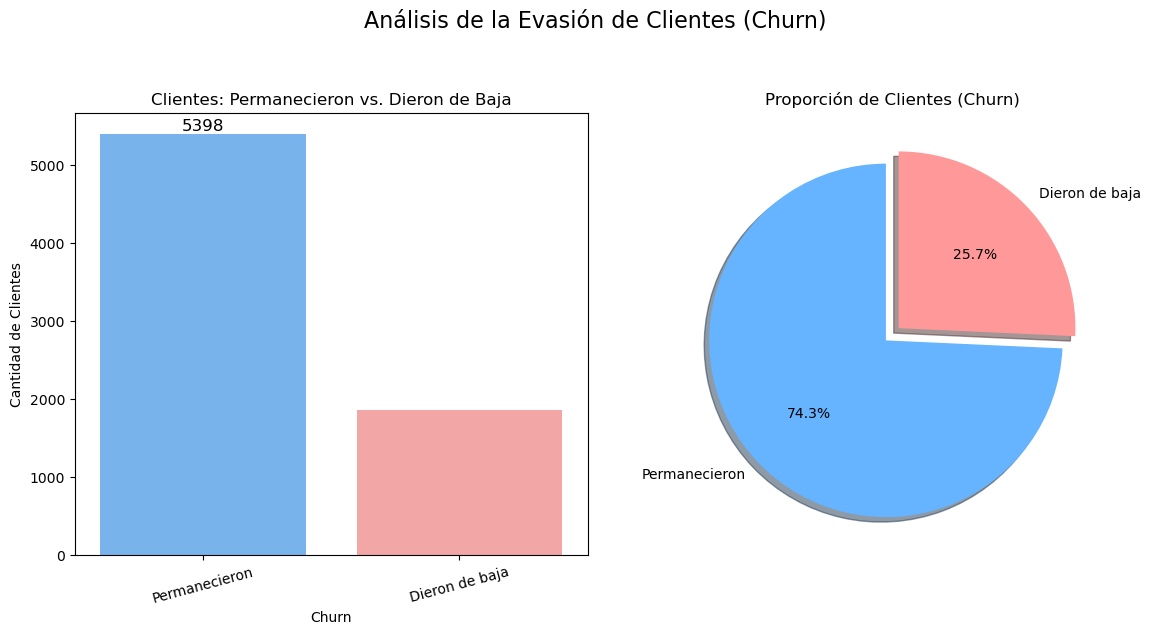

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de valores
churn_counts = df['Churn'].value_counts()
labels = ['Permanecieron', 'Dieron de baja']
colors = ['#66b3ff', '#ff9999']

# Crear figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras a la izquierda
sns.barplot(
  x=churn_counts.index, 
  y=churn_counts.values, 
  hue=churn_counts.index,
  ax=axes[0], 
  palette=colors,
  legend=False
)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels, rotation=15)
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_title('Clientes: Permanecieron vs. Dieron de Baja')
axes[0].bar_label(axes[0].containers[0], fmt='%d', label_type='edge', fontsize=12)

# Gráfico de pastel a la derecha
axes[1].pie(
  churn_counts, 
  labels=labels, 
  autopct='%1.1f%%', 
  startangle=90, 
  colors=colors, 
  shadow=True, 
  explode=(0.05, 0.05)
)
axes[1].set_title('Proporción de Clientes (Churn)')

# Título general
fig.suptitle('Análisis de la Evasión de Clientes (Churn)', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
!